<h1>Treinamento</h1>

<Axes: >

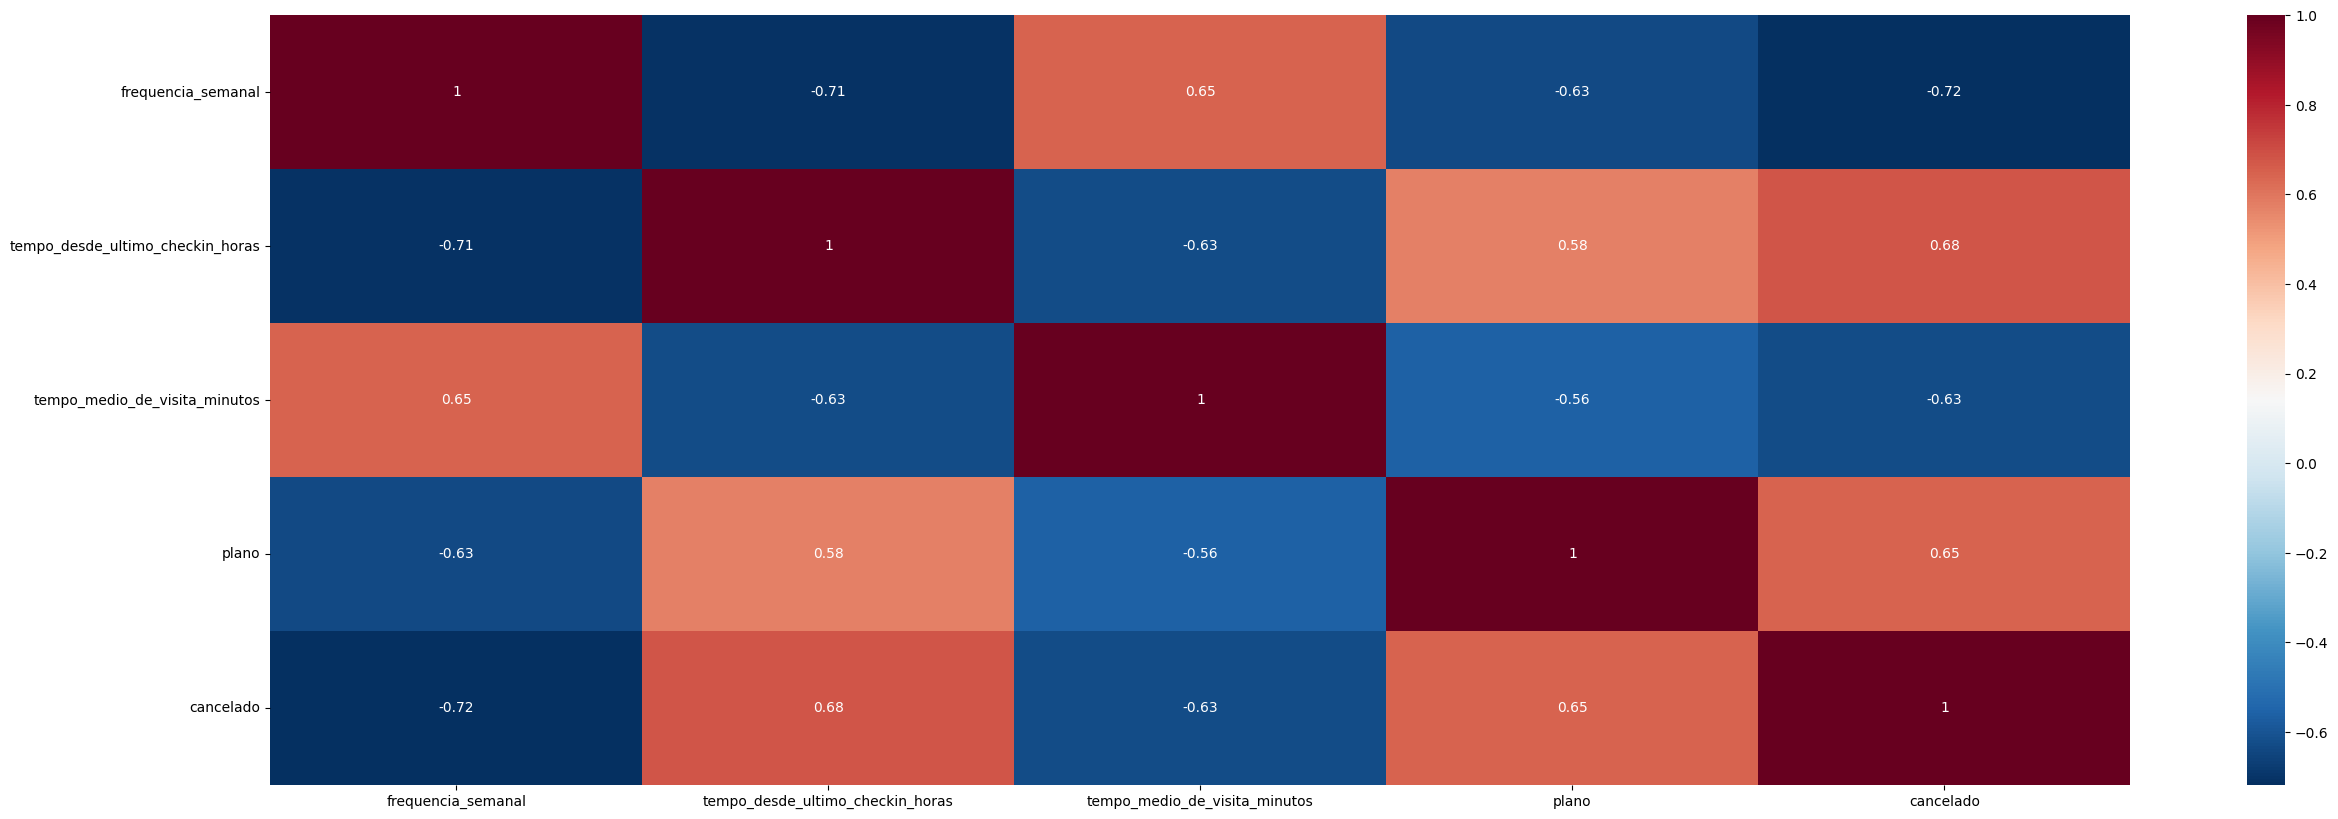

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import openpyxl

df = pd.read_excel('treinamento.xlsx')


plt.figure(figsize=(30,10))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            annot=True,)

<h3>Com base no gráfico de correlação entre os campos, podemos ver que os campos estão com uma relação muito boa, o que garante maior precisão durante os treinamentos, dessa forma não será necessário remover nenhum campo</h3>

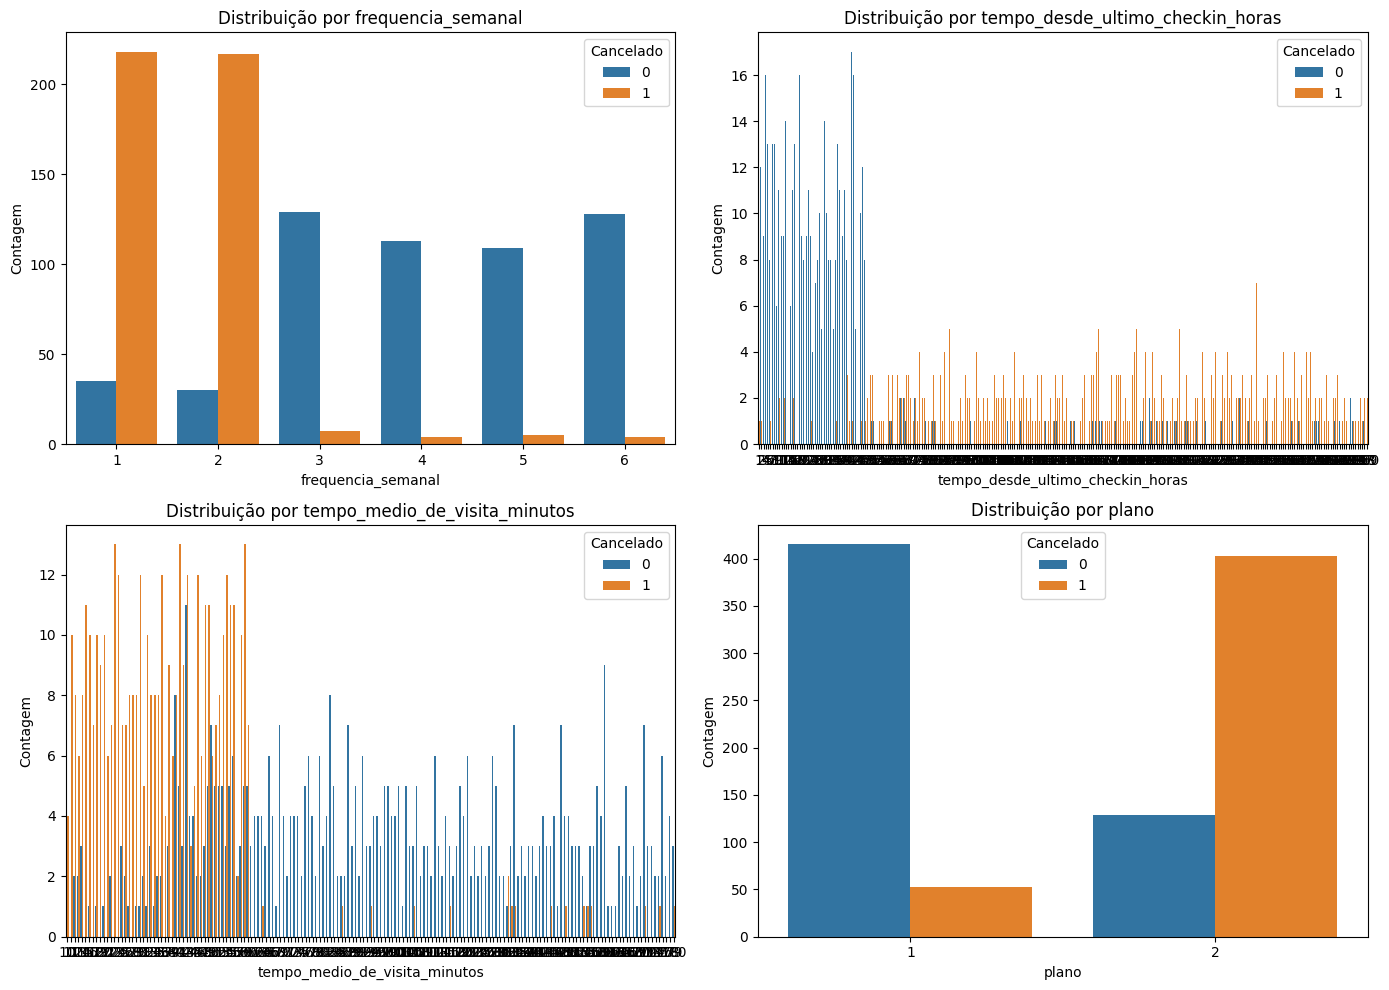

In [ ]:
colunas_para_analisar = ['frequencia_semanal', 'tempo_desde_ultimo_checkin_horas', 'tempo_medio_de_visita_minutos', 'plano']
			
n_colunas = 2
n_linhas = (len(colunas_para_analisar) + 1) // n_colunas

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(14, 5 * n_linhas))
axes = axes.flatten() 

for i, coluna in enumerate(colunas_para_analisar):
    sns.countplot(data=df, x=coluna, hue='cancelado', ax=axes[i])
    axes[i].set_title(f'Distribuição por {coluna}')
    axes[i].set_xlabel(coluna)
    axes[i].set_ylabel('Contagem')
    axes[i].legend(title='Cancelado')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h3>Com base nos gráficos, podemos dizer 4 coisas:</h3><br>
1 - Quem frequenta a academia mais vezes por semana tende a não cancelar <br>
2 - Quem tende a ficar muito tempo sem comparecer a academia tende a cancelar<br>
3 - Quem passa muito tempo na academia tende a não cancelar<br>
4 - Quem opta pelo plano 2 tende a não cancelar

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

X = df.drop(columns=['cancelado'])
y = df['cancelado']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

colunas = [
    'frequencia_semanal',
    'tempo_desde_ultimo_checkin_horas',
    'tempo_medio_de_visita_minutos',
    'plano'
]

print("Resultados dos modelos e previsão para o novo aluno:\n")
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print(f"Modelo: {nome}")
    print(f"  Acurácia: {accuracy_score(y_test, y_pred):.4f}")

    lista_alunos_bons = [[[5, 24, 60, 1]],[[6, 44, 90, 2]],[[4, 30, 100, 2]]]
    lista_alunos_ruins =  [[[1, 96, 60, 2]],[[2, 124, 45, 1]],[[3, 95, 30, 1]]]


    for aluno in lista_alunos_ruins:
        df_aluno = pd.DataFrame([aluno[0]], columns=colunas)
        proba_novo = modelo.predict_proba(df_aluno)[0][1]
        print(f"  Probabilidade de Churn para um aluno ruim: {proba_novo * 100:.2f}%")

    for aluno in lista_alunos_bons:
        df_aluno = pd.DataFrame([aluno[0]], columns=colunas)
        proba_novo = modelo.predict_proba(df_aluno)[0][1]
        print(f"  Probabilidade de Churn para um aluno bom: {proba_novo * 100:.2f}%")





Resultados dos modelos e previsão para o novo aluno:

Modelo: Logistic Regression
  Acurácia: 0.9100
  Probabilidade de Churn para um aluno ruim: 82.96%
  Probabilidade de Churn para um aluno ruim: 48.19%
  Probabilidade de Churn para um aluno ruim: 31.53%
  Probabilidade de Churn para um aluno bom: 3.46%
  Probabilidade de Churn para um aluno bom: 3.47%
  Probabilidade de Churn para um aluno bom: 12.54%
  Probabilidade de Churn para um aluno bom: 12.94%
Modelo: Random Forest
  Acurácia: 0.8900
  Probabilidade de Churn para um aluno ruim: 87.00%
  Probabilidade de Churn para um aluno ruim: 68.00%
  Probabilidade de Churn para um aluno ruim: 63.00%
  Probabilidade de Churn para um aluno bom: 1.00%
  Probabilidade de Churn para um aluno bom: 0.00%
  Probabilidade de Churn para um aluno bom: 0.00%
  Probabilidade de Churn para um aluno bom: 33.00%
Modelo: KNN
  Acurácia: 0.9033
  Probabilidade de Churn para um aluno ruim: 80.00%
  Probabilidade de Churn para um aluno ruim: 80.00%
  Probab

<h3>Com esses resultados podemos dizer que o melhor modelo para esse cenário é o Logistic Regression. Os dados que foram utilizados para testar esses 6 alunos bons e ruins foram feitos a mão para que fossem de fato alunos bons e ruins e o modelo se mostrou muito bom na previsão deles, não demonstrando qualquer tipo de valor ilusório, diferente dos modelos KNN e Random Forest, que devolveram probabilidades de 0,00% (valores muito baixos para serem considerados reais para esse cenário)</h3>